<a href="https://colab.research.google.com/github/DKowarsch/Business-Analytics/blob/MGMT566/Copy_of_Decision_Trees_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [ ]:
# Deal with data
tp = {'French' : 0, 'Thai': 1, 'Italian' : 2, 'Burger': 3}
price = {'$': 0, '$$': 1, '$$$': 2}
est = {'0-10' : 0, '10-30': 1, '30-60' : 2, '>60': 3}
pat = {'None' : 0, 'Some' : 1, 'Full':2}

x = np.array([
# 0     1      2     3       4            5             6      7      8              9
# Alt   Bar    Fri    Hun    Pat          Price         Rain   Res    Type           Est
[True,  False, False, True,  pat['Some'], price['$$$'], False, True,  tp['French'],  est['0-10']], # true
[True,  False, False, True,  pat['Full'], price['$'],   False, False, tp['Thai'],    est['30-60']], # false
[False, True,  False, False, pat['Some'], price['$'],   False, False, tp['Burger'],  est['0-10']], # true
[True,  False, True,  True,  pat['Full'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # true
[True,  False, True,  False, pat['Full'], price['$$$'], False, True,  tp['French'],  est['>60']], # false
[False, True,  False, True,  pat['Some'], price['$$'],  True,  True,  tp['Italian'], est['0-10']], # true
[False, True,  False, False, pat['None'], price['$'],   True,  False, tp['Thai'],    est['10-30']], # false
[False, False, False, True,  pat['Some'], price['$$'],  True,  True,  tp['Thai'],    est['0-10']], # true
[False, True,  True,  False, pat['Full'], price['$'],   True,  False, tp['Burger'],  est['>60']], # false
[True,  True,  True,  True,  pat['Full'], price['$$$'], False, True,  tp['Italian'], est['10-30']], # false
[False, False, False, False, pat['None'], price['$'],   False, False, tp['Thai'],    est['0-10']], #false
[True,  True,  True,  True,  pat['Full'], price['$'],   False, False, tp['Burger'],  est['30-60']], # true
])

y = np.array([True, False, True, True, False, True, False, True, False, False, False, True])

#print the array
print(x)
#convert it to pandas' data frame

df_x = pd.DataFrame(x, columns = ['Alterative','Bar','Friday','Hungry','Pat',
                                  'Price','Rain','Reservation','Type','EstimatedWaitTime'])
df_y = pd.DataFrame(y, columns = ['Wait_or_Not'])
df = pd.concat([df_x, df_y], axis = 1)
df




[[1 0 0 1 1 2 0 1 0 0]
 [1 0 0 1 2 0 0 0 1 2]
 [0 1 0 0 1 0 0 0 3 0]
 [1 0 1 1 2 0 1 0 1 1]
 [1 0 1 0 2 2 0 1 0 3]
 [0 1 0 1 1 1 1 1 2 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 0 0 1 1 1 1 1 1 0]
 [0 1 1 0 2 0 1 0 3 3]
 [1 1 1 1 2 2 0 1 2 1]
 [0 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 2 0 0 0 3 2]]


,Alterative,Bar,Friday,Hungry,Pat,Price,Rain,Reservation,Type,EstimatedWaitTime,Wait_or_Not
0,1,0,0,1,1,2,0,1,0,0,True
1,1,0,0,1,2,0,0,0,1,2,False
2,0,1,0,0,1,0,0,0,3,0,True
3,1,0,1,1,2,0,1,0,1,1,True
4,1,0,1,0,2,2,0,1,0,3,False
5,0,1,0,1,1,1,1,1,2,0,True
6,0,1,0,0,0,0,1,0,1,1,False
7,0,0,0,1,1,1,1,1,1,0,True
8,0,1,1,0,2,0,1,0,3,3,False
9,1,1,1,1,2,2,0,1,2,1,False


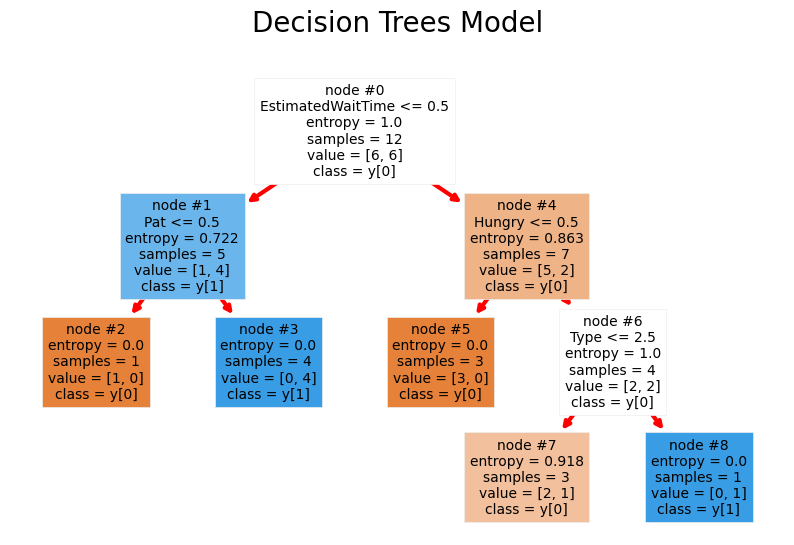

In [ ]:
# Build a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3)
clf = clf.fit(df_x, df_y)

# Define target variable class names for the legend
class_names = df_y[df_y.columns[0]].unique()

# Visualize the tree model
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the tree with feature names, filled boxes, and class names
out = tree.plot_tree(clf, filled=True, fontsize=10, feature_names=df_x.columns, class_names= True,node_ids = True)

# Modify arrow properties and add condition labels
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

# Add legend for class names
plt.title('Decision Trees Model', fontsize = 20, loc ='center', pad = 30)

plt.show()

**Observations:**

- The estimated wait time is the first node in the decision tree which implies that it provides the highest information gain while deciding whether a person would wait or not.
- The first node splits the data at 0.5 which means that in a majority of scenarios, the waiting time of more than 10 minutes is a significant factor in deciding whether the customer would wait or not.
- A customer would not even wait for 10 minutes if the restaurant has no customers which makes sense. If there are some people in the restaurant then the customer would wait.
- If a customer has to wait more than 10 minutes, then it depends on whether the customer is hungry or not. If a customer is not hungry, then he/she would not wait.
- If a customer has to wait longer than 10 and is hungry, then the customer would most likely wait if the restaurant serves burgers (assuming cuisine specific restaurants do not serve burgers).